# FAA 1462 Pareja 10. Práctica 4 REGRESIÓN LOGÍSTICA Y ANÁLISIS ROC
## Kevin de la Coba Malam

En este documento se hara un análisis del clasificador de **Algoritmos Genéticos** usando diferenrtes *poblaciones*, *generaciones*, *cruces*, *mutaciones* y *elitismo*. También se comparará el algoritmo con el clasificador de  **Naive Bayes** mediante el *espacio ROC*. 

En está practica, se ha usado solo la validación simple. En concreto, con la validación simple se usán valores para el %: **20** (se ejecutará 3 veces). Al tener varios tipos de mutación y cruce el test se hace muy largo.

Para simplificar el documento se ha creado el archivo *utils.py* en el cual se encuentran las funciones para clasificar, mostrar gráficas...

### Modificaciones

- La clase Datos se ha modificado, el constructor tiene un parametro opcional (allNominal) que por defecto está a False para tratar a todos los atributos como si fuesen nominales. 

In [1]:
# Para esconder los warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from ClasificadorAlgoritmoGenetico import AlgoritmoGenetico as AG
from Datos import Datos
import utils
import matplotlib.pyplot as plt

# Cargamos datos
titanic = Datos("titanic.csv", allNominal=True)
ttt = Datos("tic-tac-toe.data")

## 1. Detalles de la implementación

Lo primero sería mencionar la estructura que tiene cada individuo. Para crear esta estructura se ha hecho una clase interna en la cual se define a un individuo con los siguientes datos.
```py
class Individuo:
	fitnessValue # Valor de fitness del individuo
	priori # Clase mayoritaria de los datos
	reglas = [
		{"regla": [int], "conclusion": int} # Cada regla es un diccionario
		...
	]
```
Para representar las reglas se usa un diccionario, en este diccionario tenemos la clave "regla" en la cual el valor es una lista de enteros. Cada entero de esta lista hace referencia a la cadena de bits para un atributo, por ejemplo: Si tenemos 3 atributos A, B y C, tendremos 3 enteros en la lista, si cada atributo tiene 3 valores, se usaran 3 bits de cada entero. Para operar con estos bits se usan bit operators (&, |).

La conclusión es un entero que marca 0 o 1.

### 1.1 Generación de la población inicial

Las reglas se crean de forma aleatoria, asignando para cada atributo una cadena aleatoria (de la cual solo se van a usar los N primeros bits, siendo N el número de posibles valores en el atributo). Para este análisis se usaran individuos con un **máximo de 5 reglas**.

### 1.2 Cruces implementados

Se han implementado el cruce *inter reglas* y el cruce *intra reglas*. Son métodos estáticos de la clase *ClasificadorAlgoritmoGenetico* que deben pasarse al propio constructor de la clase (patrón template).

### 1.3 Mutaciones implementadas

Se ha implementado la *mutación estandar* y la *mutación de reglas*. De nuevo, son métodos estáticos que deben pasarse al constructor.

### 1.4 Clasificación

La clasificación es simple, se coge al mejor individuo del entrenamiento y se aplican las reglas, pero, ¿cómo se aplican estas reglas? Al utilizar cadenas de bits para cada atributo es simple comparar si un valor se cumple en una regla o no, por ejemplo:
Si tenemos el atributo A con los posibles datos 'a', 'b', 'c', tendríamos una cadena de bits para este atributo con 3 bits. Si recibimos el valor 'a', recibimos la cadena 001 (un entero con valor 1), si recibimos 'b' 010 (entero con valor 2) y si recibimos 'c' 100 (entero con valor 4). Con puertas lógicas es muy simple comparar estos valores. Si tenemos la regla 101 (entero con valor 5) y recibimos el valor 001 (a) (aplicamos la puerta lógica and sobre los valores enteros 5 y 1, 101 & 001), pues esa parte de la regla se aprobaría para este atributo y haría falta hacerlo con todos los demás, si se cumplen todos devolvemos la conclusión.
Si varias reglas se cumplen, escogemos la conclusión mayoritaria, y si no se cumple ninguna regla, devolvemos la clase mayoritaria (a priori).

En el entrenamiento (también en la clasificación) puede pasar que varias relgas se cumplan o que no se cumpla ninguna, en el primer caso lo que se hace es devolver la conclusión mayoritaria, en el segundo caso se devulve la clase a priori (clase mayoritaria).

## 2. Resultados clasificación.

Las opciones que se han usado para la clasificación son las siguientes:
- **Población**: Variable [50-150].
- **Generacion**: Variable [100-200].
- **Máximo número de reglas**: 5.
- **Probabilidad mutación**: 5%.
- **Proporción de elitismo**: 5%.
- **Cruce**: Ambos (inter e intra).
- **Mutación**: Ambas (estandar y de reglas).
- **Método de validación**: Simple 20%.

### Cruce *Inter Reglas* y mutación *estandar*

In [2]:
errorMedioTTT_inter_estandar, errorMedioTITANIC_inter_estandar = utils.AG_test(ttt, titanic, AG.cruceInterReglas, AG.mutacionEstandar)

Test Poblacion=20 Generaciones=10	Tic-Tac-Toe - Error=0.250000		Titanic - Error=0.250000

[Tic-Tac-Toe] reglas del mejor individuo:
 [REGLA 1] - IF EDAD=(avanzada OR joven) AND LESION=(hipermetropía) AND ASTIGMATISMO=(no) AND PROD_LAGRIM=(normal) AND DIAGNOSTICO=(blandas OR duras) THEN concl=blandas
[REGLA 2] - IF EDAD=(mediana) AND LESION=(hipermetropía) AND ASTIGMATISMO=(no) AND PROD_LAGRIM=(normal) AND DIAGNOSTICO=(blandas OR no) THEN concl=blandas

[Titanic] reglas del mejor individuo:
 [REGLA 1] - IF EDAD=(avanzada) AND LESION=(hipermetropía) AND ASTIGMATISMO=(no) AND PROD_LAGRIM=(normal) AND DIAGNOSTICO=(blandas OR no) THEN concl=blandas
[REGLA 2] - IF EDAD=(joven) AND LESION=(hipermetropía) AND ASTIGMATISMO=(no) AND PROD_LAGRIM=(normal) AND DIAGNOSTICO=(blandas) THEN concl=blandas

Test Poblacion=20 Generaciones=30	Tic-Tac-Toe - Error=0.000000		Titanic - Error=0.500000

[Tic-Tac-Toe] reglas del mejor individuo:
 [REGLA 1] - IF EDAD=(joven OR mediana) AND LESION=(hipermetropía) A

### Cruce *Inter Reglas* y mutación *de reglas*

In [3]:
errorMedioTTT_inter_reglas, errorMedioTITANIC_inter_reglas = utils.AG_test(ttt, titanic, AG.cruceInterReglas, AG.mutacionReglas)

Test Poblacion=20 Generaciones=10	Tic-Tac-Toe - Error=0.000000		Titanic - Error=0.500000

[Tic-Tac-Toe] reglas del mejor individuo:
 [REGLA 1] - IF EDAD=(avanzada) AND ) AND ASTIGMATISMO=(no OR sí) AND PROD_LAGRIM=(normal) AND DIAGNOSTICO=(blandas OR duras OR no) THEN concl=duras
[REGLA 2] - IF EDAD=(joven OR mediana) AND ) AND ASTIGMATISMO=(no OR sí) AND PROD_LAGRIM=(normal OR reducida) AND DIAGNOSTICO=(duras) THEN concl=blandas

[Titanic] reglas del mejor individuo:
 [REGLA 1] - IF EDAD=(avanzada OR joven) AND LESION=(hipermetropía OR miopía) AND ASTIGMATISMO=(sí) AND ) THEN concl=duras
[REGLA 2] - IF EDAD=(avanzada OR joven OR mediana) AND LESION=(hipermetropía OR miopía) AND ASTIGMATISMO=(sí) AND PROD_LAGRIM=(normal OR reducida) AND DIAGNOSTICO=(blandas OR duras OR no) THEN concl=blandas

Test Poblacion=20 Generaciones=30	Tic-Tac-Toe - Error=0.500000		Titanic - Error=0.250000

[Tic-Tac-Toe] reglas del mejor individuo:
 [REGLA 1] - IF EDAD=(joven) AND ) AND ASTIGMATISMO=(sí) AND PRO

### Cruce *Intra Reglas* y mutación *estandar*

In [4]:
errorMedioTTT_intra_estandar, errorMedioTITANIC_intra_estandar = utils.AG_test(ttt, titanic, AG.cruceIntraReglas, AG.mutacionEstandar)

Test Poblacion=20 Generaciones=10	Tic-Tac-Toe - Error=0.250000		Titanic - Error=0.250000

[Tic-Tac-Toe] reglas del mejor individuo:
 [REGLA 1] - IF EDAD=(joven OR mediana) AND LESION=(hipermetropía) AND ASTIGMATISMO=(no) AND PROD_LAGRIM=(normal) AND DIAGNOSTICO=(duras) THEN concl=duras
[REGLA 2] - IF EDAD=(avanzada) AND LESION=(hipermetropía) AND ASTIGMATISMO=(no) AND PROD_LAGRIM=(normal) THEN concl=duras
[REGLA 3] - IF EDAD=(avanzada OR joven OR mediana) AND LESION=(hipermetropía) AND ASTIGMATISMO=(no) AND PROD_LAGRIM=(normal) AND DIAGNOSTICO=(blandas) THEN concl=duras
[REGLA 4] - IF EDAD=(mediana) AND LESION=(hipermetropía) AND ASTIGMATISMO=(no) AND PROD_LAGRIM=(normal) AND DIAGNOSTICO=(duras) THEN concl=duras

[Titanic] reglas del mejor individuo:
 [REGLA 1] - IF EDAD=(mediana) AND LESION=(hipermetropía) AND ASTIGMATISMO=(no) AND PROD_LAGRIM=(normal) AND DIAGNOSTICO=(blandas OR duras) THEN concl=duras
[REGLA 2] - IF EDAD=(avanzada) AND LESION=(hipermetropía) AND ASTIGMATISMO=(no) AN

### Cruce *Intra Reglas* y mutación *de reglas*

In [5]:
errorMedioTTT_intra_reglas, errorMedioTITANIC_intra_reglas = utils.AG_test(ttt, titanic, AG.cruceIntraReglas, AG.mutacionReglas)

Test Poblacion=20 Generaciones=10	Tic-Tac-Toe - Error=0.500000		Titanic - Error=0.250000

[Tic-Tac-Toe] reglas del mejor individuo:
 [REGLA 1] - IF EDAD=(avanzada OR mediana) AND PROD_LAGRIM=(reducida) THEN concl=blandas
[REGLA 2] - IF EDAD=(avanzada OR joven) AND LESION=(miopía) AND ASTIGMATISMO=(sí) AND DIAGNOSTICO=(no) THEN concl=duras
[REGLA 3] - IF EDAD=(avanzada OR mediana) AND LESION=(hipermetropía OR miopía) AND ASTIGMATISMO=(no OR sí) AND DIAGNOSTICO=(blandas OR duras OR no) THEN concl=duras
[REGLA 4] - IF EDAD=(avanzada OR joven OR mediana) AND LESION=(hipermetropía OR miopía) AND ASTIGMATISMO=(sí) THEN concl=blandas

[Titanic] reglas del mejor individuo:
 [REGLA 1] - IF PROD_LAGRIM=(normal OR reducida) AND DIAGNOSTICO=(blandas) THEN concl=blandas
[REGLA 2] - IF EDAD=(mediana) AND ASTIGMATISMO=(no) AND PROD_LAGRIM=(reducida) AND DIAGNOSTICO=(blandas OR duras OR no) THEN concl=duras

Test Poblacion=20 Generaciones=30	Tic-Tac-Toe - Error=0.500000		Titanic - Error=0.750000

[Tic

### Población - Tic-Tac-Toe

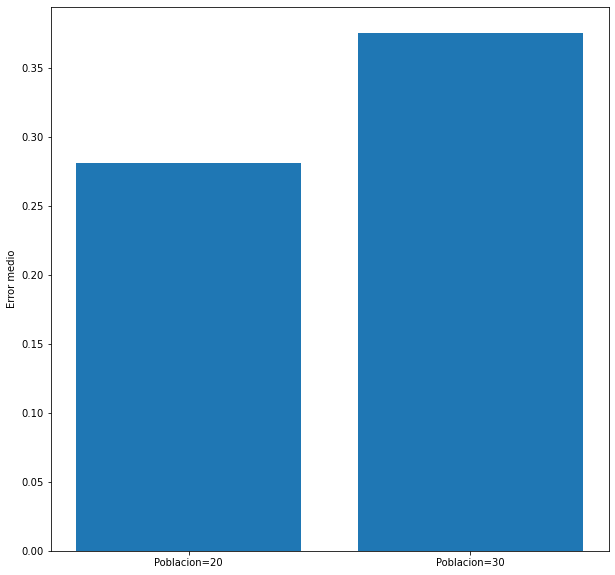

In [6]:
utils.plot_poblacion([errorMedioTTT_inter_estandar, errorMedioTTT_inter_reglas, errorMedioTTT_intra_estandar, errorMedioTTT_intra_reglas])

### Población - Titanic

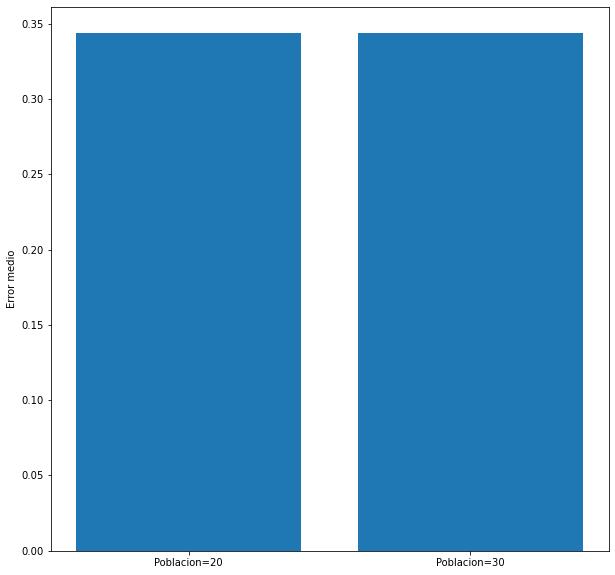

In [7]:
utils.plot_poblacion([errorMedioTITANIC_inter_estandar, errorMedioTITANIC_inter_reglas, errorMedioTITANIC_intra_estandar, errorMedioTITANIC_intra_reglas])

### Cruce - Tic-Tac-Toe

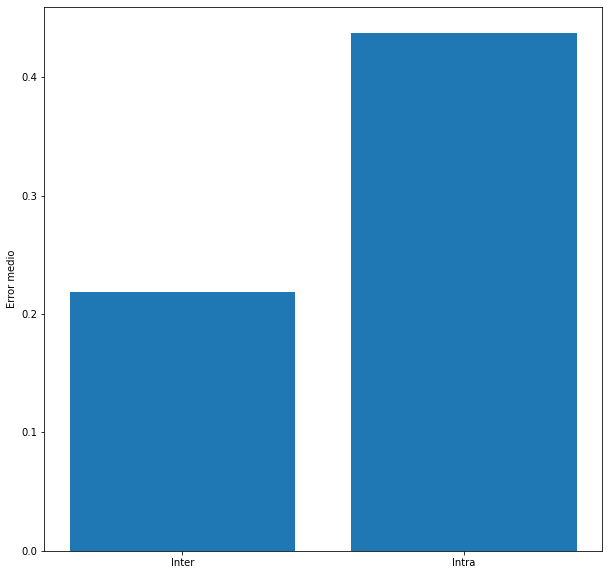

In [8]:
utils.plot_comp([errorMedioTTT_inter_estandar, errorMedioTTT_inter_reglas], [errorMedioTTT_intra_estandar, errorMedioTTT_intra_reglas], ["Inter", "Intra"])

### Cruce - Titanic

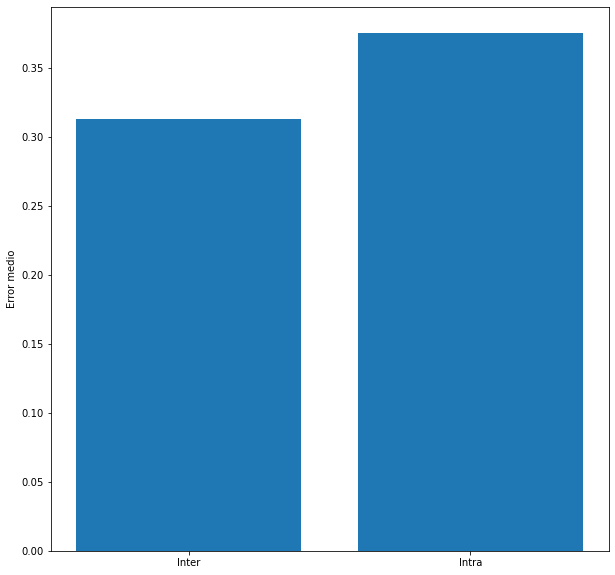

In [9]:
utils.plot_comp([errorMedioTITANIC_inter_estandar, errorMedioTITANIC_inter_reglas], [errorMedioTITANIC_intra_estandar, errorMedioTITANIC_intra_reglas], ["Inter", "Intra"])

### Mutación - Tic-Tac-Toe

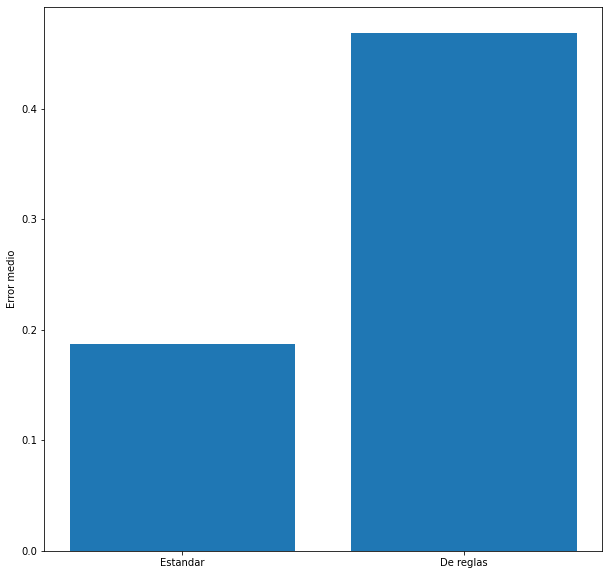

In [10]:
utils.plot_comp([errorMedioTTT_inter_estandar, errorMedioTTT_intra_estandar], [errorMedioTTT_inter_reglas, errorMedioTTT_intra_reglas], ["Estandar", "De reglas"])

### Mutación - Titanic

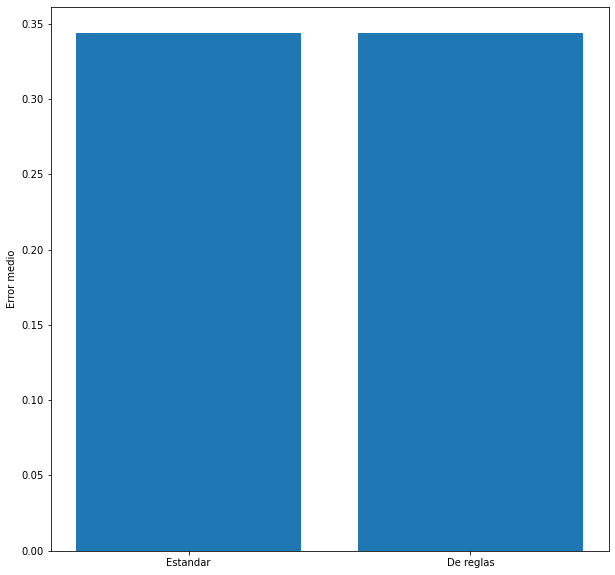

In [11]:
utils.plot_comp([errorMedioTITANIC_inter_estandar, errorMedioTITANIC_intra_estandar], [errorMedioTITANIC_inter_reglas, errorMedioTITANIC_intra_reglas], ["Estandar", "De reglas"])

# PONER CONCLUSION APARTADO ANTERIOR. DECIR QUE poblacion y generaciones es mejor, y decir que cruce y que mutacion es mejor.

Podemos ver que tras cada ejecución se muestran las reglas de los mejores individuos en cada una de estas. En estas reglas predomina la **conclusión=1** con muy escasas reglas que contengan una **conclusión=0**, las que tienen 0, se han generado mediante cruces intra reglas.  

Con respecto a los métodos de cruce, no vemos una diferencia notoria en los resultados, lo mismo pasa con la mutación, las diferentes mutaciones no han provocado un cambio notorio en el error.
Lo que si que provoca una diferencia es el número de generaciones, en general cuantas menos generaciones, más error. Pero esta regla no siempre se cumple debido a la aleatoriedad del algoritmo, puede pasar que en la generación 2, se cree un individuo el cuál tiene un fitness muy alto.

Podemos concluir que tenemos un error medio en el dataset de **Tic-Tac-Toe del 30%** y en del **Titanic del 40%-45%**, el **número de generaciones más optimo es 200** y la población más optima es


## 3. Análisis
Lo primero que destaca a la vista es el pronunciado error. Una de las posibles razones es por **la validación en si**, al no entrenar con todos los datos puede que las reglas se *sobreajusten* a los datos (el fitness del mejor individuo suele rondar el 70%-90% de aciertos, puede que se sobreajuste a los datos de entrenamiento), puede que el mejor individuo tras el entrenamiento tenga reglas que no se adecúen correctamente a los datos de test, esto provoca que se recurra mucho al priori provocando quizás mas errores de los deseados. Otra razón puede ser el **número de reglas**, este puede ser un factor clave en relación al error obtenido. Por último, otra razón que se me ocurre es por el hecho de que el algoritmo en si **es muy aleatorio**, puede que esa aleatoriedad no permita una clasificación mejor. De hecho, se puede ver como en el dataset titanic tenemos un resultado de error del 24% usando un cruce intra reglas y una mutación de reglas, pero este resultado probablemente sea debido a la aleatoriedad.

Algo que se puede ver, es que en algunos individuos se repiten reglas, asumo que esto significa que estas reglas son buenas, ya que al cruzar individuos se han mantenido durante generaciones. Pero esto también tiene otra explicación, y es el propio método de cruce, el *cruce inter reglas* cruza las reglas de dos individuos **sin modificarlas**, esto puede causar lo anteriormente mencionado. En el cruce intra reglas no vemos tanta repetición de reglas, ya que las reglas **son modificadas**.

Otro factor relevante es la *probabilidad de mutación*. Una probabilidad mayor podría acelerar el proceso de encontrar un muy buen individuo, pero hay que tener cuidado, una probabilidad muy grande puede provocar más errores, es muy similar al descenso de gradiente en regresión logística, si la constante de aprendizaje era muy alta, puede que no encontrasemos nunca mínimos, lo mismo pasa aquí, una probabilidad muy alta de mutación puede que lastre al algoritmo. El método de mutación también es importante, ya que en la mutación estandar cambiamos un único bit de una única regla, mientras que la mutación de reglas pasa por todos los bits tratando de cambiarlos. Podemos decir que en uno se tira un dado, y en otro se tira el dado muchas veces.

Otra cosa que se ve de los mejores individuos es el *número de reglas*, a pesar de que la razón puede decirnos que "cuantas más mejor", vemos que los mejores individuos no siempre tienen el núemro máximo de reglas. En muchos casos tienen 2 o 3, aunque de media diría que hay 3 reglas.

En cuanto al tamaño de la población, este es importante. Un tamaño de mutación amplio permite variedad de individuos aunque, no es necesario poner de más. Hay que tener en cuenta el número de atributos y el número de posibles valores de cada uno, ya que si ponemos más individuos que combinaciones no tendría sentido, aunque también es cierto que el número de combinaciones asciende rápidamente si el dataset es grande, haciendo casi imposible crear muchos individuos.

Por último, el *número de generaciones*. Cuantas más generaciones mejor, aunque hay que poner un límite, ya que en un punto será muy difícil para el algoritmo encontrar un individuo mejor que el que hay y lo único que haremos será gastar recursos (esto se ve mejor en el siguiente apartado).

## 4. Evolución del fitness
### 4.1 Titanic

<Figure size 1440x1440 with 0 Axes>

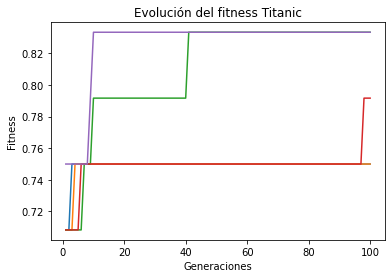

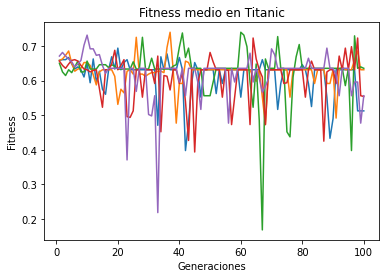

In [12]:
# Plot de 2 fitness maximo y medio, en cada plot varios runs
utils.plot(titanic, "Titanic", AG.cruceInterReglas, AG.mutacionReglas)

Lo que podemos ver aquí es el crecimiento del fitness en varias ejecuciones (5) de entrenamiento el algoritmo entrena durante 100 generaciones. Vemos que en general, el mejor individuo se suele encontrar antes de llegar a 35 generaciones, después, el fitness se mantiene estable. Esto quiere decir que al algoritmo le cuesta encontrar mejores individuos.

Debido a la aleatoriedad del algoritmo podemos ver que no siempre el crecimiento es el mismo, y que no se llegan a los mismos valores.

En cuanto a la media, vemos que no es un valor estable, la media depende de todos los individuos de la poblacion, puede pasar que haya un individuo muy bueno pero que los demas sean muy malos, haciendo que la media varie mucho.

### 4.2 Tic-Tac-Toe

<Figure size 1440x1440 with 0 Axes>

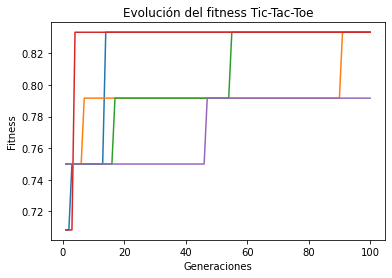

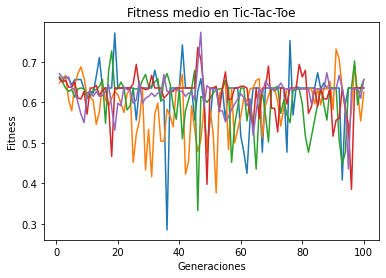

In [13]:
# Plot de 2 fitness maximo y medio, en cada plot varios runs
utils.plot(ttt, "Tic-Tac-Toe", AG.cruceInterReglas, AG.mutacionReglas)

Con el dataset Tic-Tac-Toe

## 5. Espacio ROC 
### 5.1 Titanic

<Figure size 720x720 with 0 Axes>

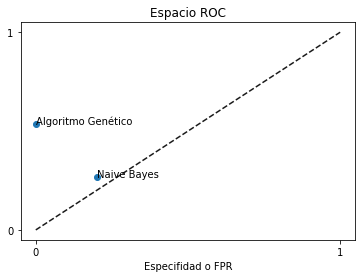

In [14]:
# Generar espacio ROC con naive bayes
utils.plot_espacio_ROC(titanic, 5, 20, AG.cruceInterReglas, AG.mutacionReglas)

Conclusion